# BT4012 Project

## Feature Details

**Transaction ID:** A unique identifier for each transaction.

**Customer ID:** A unique identifier for each customer.

**Transaction Amount:** The total amount of money exchanged in the transaction.

**Transaction Date:** The date and time when the transaction took place.

**Payment Method:** The method used to complete the transaction (e.g., credit card, PayPal, etc.).

**Product Category:** The category of the product involved in the transaction.

**Quantity:** The number of products involved in the transaction.

**Customer Age:** The age of the customer making the transaction.

**Customer Location:** The geographical location of the customer.

**Device Used:** The type of device used to make the transaction (e.g., mobile, desktop).

**IP Address:** The IP address of the device used for the transaction.

**Shipping Address:** The address where the product was shipped.

**Billing Address:** The address associated with the payment method.

**Is Fraudulent:** A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

**Account Age Days:** The age of the customer's account in days at the time of the transaction.

**Transaction Hour:** The hour of the day when the transaction occurred.


## Setup Environment

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Change your path accordingly
# %cd 'drive/My Drive/BT4012 Project'

# Read Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import requests
from sklearn.model_selection import train_test_split
from ip2geotools.databases.noncommercial import DbIpCity
from geopy.distance import distance

# Assuming your CSV file is named 'your_file.csv'
df = pd.read_csv("Source data/Fraudulent_E-Commerce_Transaction_Data_2.csv")


/Users/eldricksim/Desktop/NUS/Year 4/Y4S1/BT4012/Github Code/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Exploratory Data Analysis

In [4]:
print(df.columns)

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')


In [5]:
df.head(10)

# df.describe()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
5,5da506fe-d4df-474a-b773-146333f06cfe,03033baf-2bcc-4608-b5b8-9c86976f4948,345.27,2024-02-22 13:49:27,PayPal,toys & games,1,9,Johnsonmouth,desktop,158.48.161.135,"PSC 3832, Box 5265\nAPO AE 85694","PSC 3832, Box 5265\nAPO AE 85694",0,251,13
6,47b35c5d-d4c9-4a7d-a354-cd41596abf67,6a5305a3-b47c-4bdb-91d7-3bf126530e01,53.69,2024-03-21 13:42:10,debit card,toys & games,3,41,New Brendamouth,mobile,93.54.173.138,"272 Tammy Isle Apt. 969\nNorth Michaelmouth, M...","272 Tammy Isle Apt. 969\nNorth Michaelmouth, M...",0,138,13
7,bf3db41c-25a9-4e6d-b87f-13e5fabe35dd,7300dcf3-df6f-439f-ba13-a98f18b972f3,680.17,2024-01-18 23:25:10,debit card,electronics,5,39,South Tracy,tablet,61.52.160.51,30470 Amanda Causeway Suite 446\nLake Ashleyla...,30470 Amanda Causeway Suite 446\nLake Ashleyla...,0,36,23
8,8ec806af-c367-4dd0-8218-25d3c8c7a346,25c48d47-879f-49b3-b0cc-a7393c28f8af,126.50,2024-02-12 04:01:09,debit card,home & garden,4,35,West Henry,mobile,6.59.118.143,"179 Amy Roads\nRyanland, OH 38054","179 Amy Roads\nRyanland, OH 38054",0,188,4
9,3b51c8cd-e0d7-48ba-894f-8f77b2cf2f43,41803857-0031-499c-bcaf-bca4e4ef4620,47.18,2024-04-06 22:52:33,bank transfer,toys & games,4,19,Taylorside,mobile,17.185.69.10,"34828 Ronald Oval Suite 620\nNew Samuelmouth, ...","34828 Ronald Oval Suite 620\nNew Samuelmouth, ...",0,245,22


### Check for missing values

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

## Distribution of Fraud

In [7]:
# Calculate the count of fraudulent and non-fraudulent transactions
fraud_counts = df['Is Fraudulent'].value_counts()

# Calculate the percentage of each type of transaction
fraud_percentages = df['Is Fraudulent'].value_counts(normalize=True) * 100

# Combine both into a DataFrame for better readability
fraud_summary = pd.DataFrame({'Count': fraud_counts, 'Percentage': fraud_percentages})

# Display the summary
print(fraud_summary)

               Count  Percentage
Is Fraudulent                   
0              22412   94.829483
1               1222    5.170517


## Numerical Columns

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Transaction Amount'}>],
       [<Axes: title={'center': 'Customer Age'}>,
        <Axes: title={'center': 'Account Age Days'}>],
       [<Axes: title={'center': 'Transaction Hour'}>, <Axes: >]],
      dtype=object)

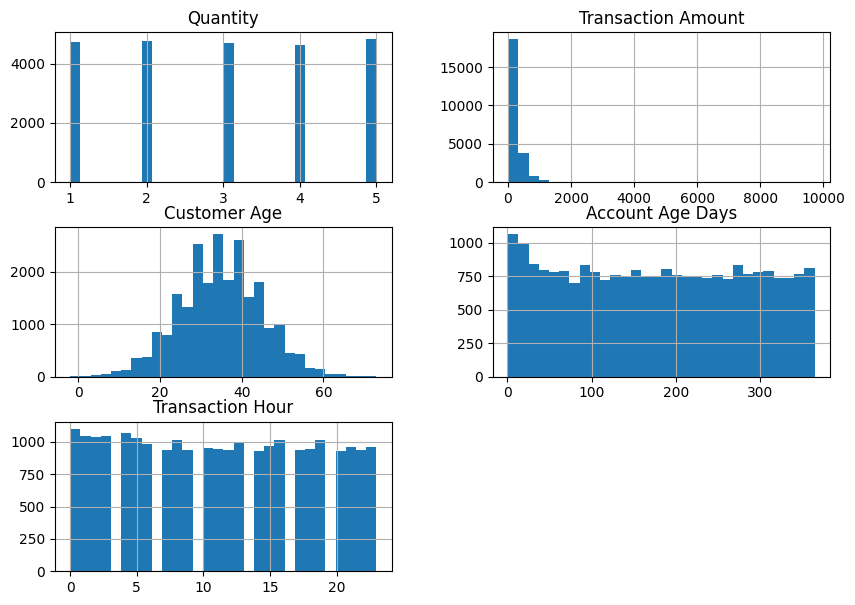

In [8]:
numerical_columns = ['Quantity', 'Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour']
df[numerical_columns].hist(bins=30, figsize=(10, 7))

`Transaction Amount` seems to have extreme outliers. Quantity only has 5 values, we can leave it out of numerical columns analysis.

Next, we graph box plots to visualise the outliers.

In [9]:
df[numerical_columns].describe()

,Quantity,Transaction Amount,Customer Age,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,3.000550,229.367099,34.560210,178.660531,11.266015
std,1.419663,282.046669,10.009471,107.388682,6.980659
min,1.000000,10.000000,-2.000000,1.000000,0.000000
25%,2.000000,69.070000,28.000000,84.000000,5.000000
50%,3.000000,151.415000,35.000000,178.000000,11.000000
75%,4.000000,296.127500,41.000000,272.000000,17.000000
max,5.000000,9716.500000,73.000000,365.000000,23.000000


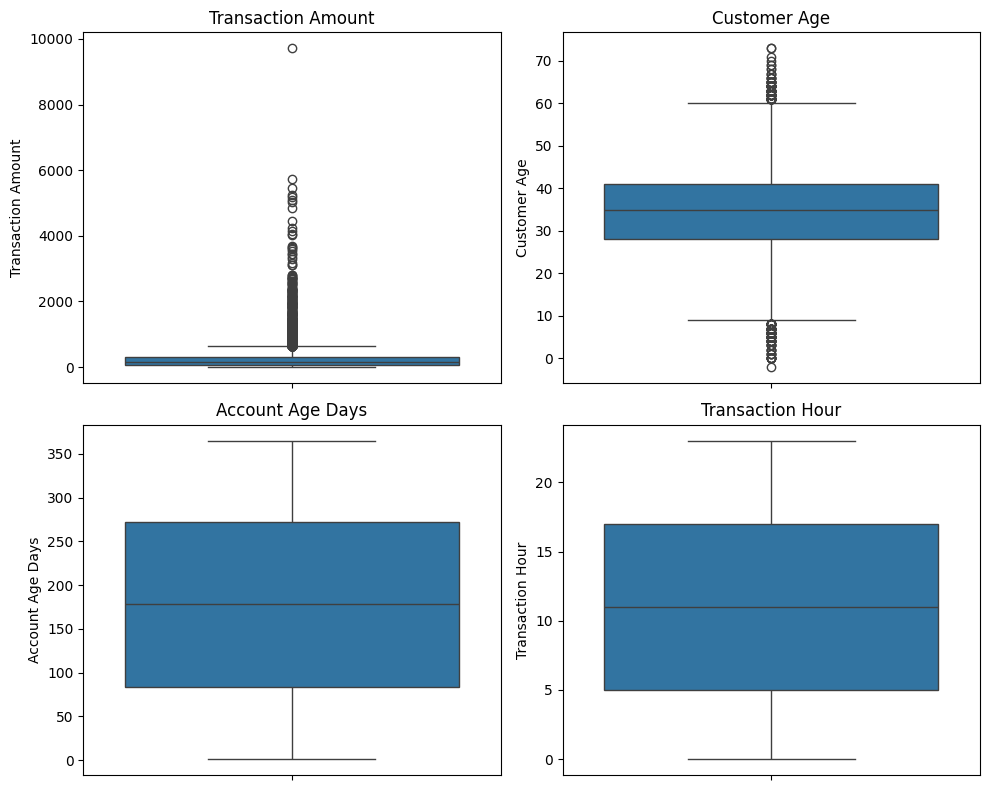

In [10]:
numerical_columns = ['Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour']

plt.figure(figsize=(10, 8))

for i, column in enumerate(numerical_columns):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(y=df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

`Transaction Amount` and `Customer Age` both have significant outliers.

To address the outliers for `Transaction Amount`, we log the values to reduce the spread.

For `Customer Age`, as all values are valid, we resort to binning these values.

### Resolving outliers in `Transaction Amount`

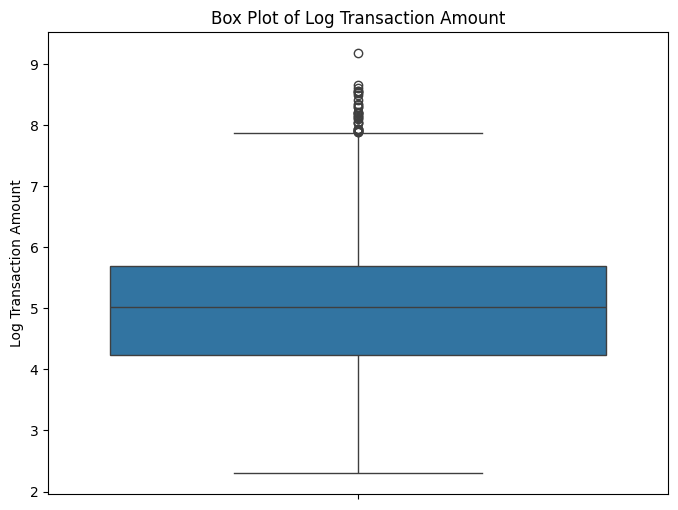

Percentage of Log Transaction Amount that is outside of the box plot: 0.14%


In [11]:
# Log the transaction amount column
df['Log Transaction Amount'] = np.log(df['Transaction Amount'])

# Plot a box plot of the Log transaction amount
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Log Transaction Amount'])
plt.title('Box Plot of Log Transaction Amount')
plt.ylabel('Log Transaction Amount')
plt.show()

# Calculate the percentage of data points outside the box plot
lower_bound = df['Log Transaction Amount'].quantile(0.25) - 1.5 * (df['Log Transaction Amount'].quantile(0.75) - df['Log Transaction Amount'].quantile(0.25))
upper_bound = df['Log Transaction Amount'].quantile(0.75) + 1.5 * (df['Log Transaction Amount'].quantile(0.75) - df['Log Transaction Amount'].quantile(0.25))

percentage_outside_boxplot = float(((df['Log Transaction Amount'] < lower_bound) | (df['Log Transaction Amount'] > upper_bound)).mean() * 100)

print(f'Percentage of Log Transaction Amount that is outside of the box plot: {percentage_outside_boxplot:.2f}%')

### Resolving outliers in `Customer Age`

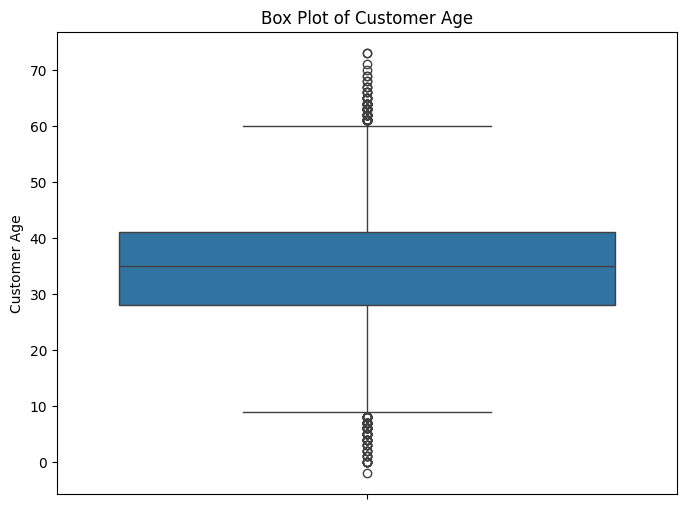

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Customer Age'])
plt.title('Box Plot of Customer Age')
plt.ylabel('Customer Age')
plt.show()

### Testing for differences in mean for Fraudulent and Non-fraudulent Customers

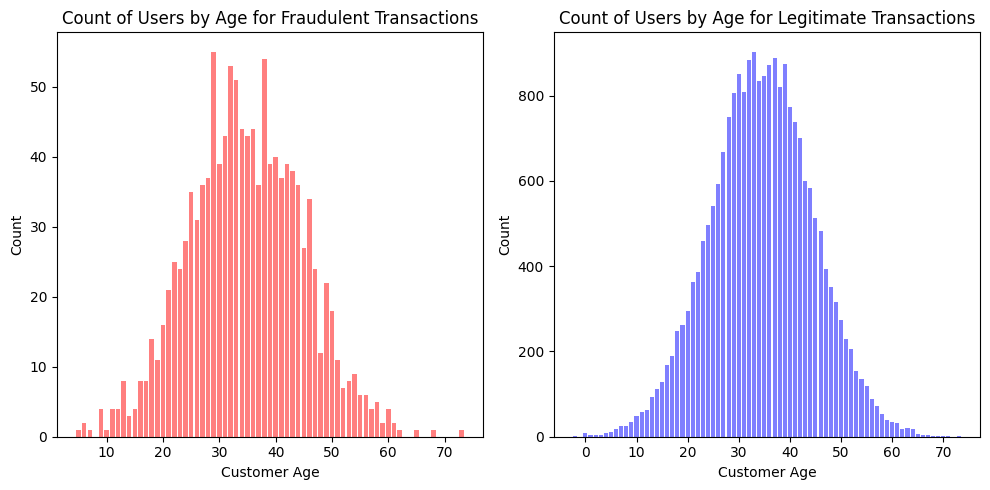

In [13]:
# Split the dataframe based on 'Is Fraudulent' column
fraudulent_df = df[df['Is Fraudulent'] == 1]
legitimate_df = df[df['Is Fraudulent'] == 0]

# Count the number of users in each age group for fraudulent and legitimate transactions
fraudulent_counts = fraudulent_df['Customer Age'].value_counts().sort_index()
legitimate_counts = legitimate_df['Customer Age'].value_counts().sort_index()

# Create subplots for side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the bar charts
axs[0].bar(fraudulent_counts.index, fraudulent_counts.values, alpha=0.5, label='Fraudulent', color='red')
axs[1].bar(legitimate_counts.index, legitimate_counts.values, alpha=0.5, label='Legitimate', color='blue')

# Add labels and title
axs[0].set_xlabel('Customer Age')
axs[0].set_ylabel('Count')
axs[0].set_title('Count of Users by Age for Fraudulent Transactions')

axs[1].set_xlabel('Customer Age')
axs[1].set_ylabel('Count')
axs[1].set_title('Count of Users by Age for Legitimate Transactions')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Split the DataFrame by "Is Fraudulent"
fraudulent_ages = df[df['Is Fraudulent'] == 1]['Customer Age']
legitimate_ages = df[df['Is Fraudulent'] == 0]['Customer Age']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(fraudulent_ages, legitimate_ages)

# Print the results

# Null Hypothesis: The mean customer age for fraudulent transactions is equal to the mean customer age for legitimate transactions
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.7408107548212719
P-Value: 0.45881555379432815


### Binning `Customer Age`

In [15]:
# Define the new age bins and labels
bins = [-20, 1, 18, 25, 35, 45, 55, 65, 75, 87]
labels = ['-20 to 0', '1-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-86']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate the range of ages (min and max)
age_range_by_group = df.groupby('Age Group',observed=False)['Customer Age'].agg(['min', 'max', 'count'])

# Display the result
print(age_range_by_group)

            min   max  count
Age Group                   
-20 to 0   -2.0   0.0      9
1-17        1.0  17.0   1045
18-25      18.0  24.0   2646
26-35      25.0  34.0   8061
36-45      35.0  44.0   8099
46-55      45.0  54.0   3225
56-65      55.0  64.0    527
66-75      65.0  73.0     22
76-86       NaN   NaN      0


In [16]:
# Define the new age bins and labels
bins = [-100, 1, 20, 30, 40, 50, 60, 70, 80, 120]
# labels = ['<0', '1-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80<']
labels = [-1, 0, 1, 2, 3, 4, 5, 6, 7]

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate the range of ages (min and max)
age_range_by_group = df.groupby('Age Group',observed=False)['Customer Age'].agg(['min', 'max', 'count'])

# Display the result
print(age_range_by_group)

            min   max  count
Age Group                   
-1         -2.0   0.0      9
 0          1.0  19.0   1580
 1         20.0  29.0   5664
 2         30.0  39.0   9023
 3         40.0  49.0   5761
 4         50.0  59.0   1444
 5         60.0  69.0    149
 6         70.0  73.0      4
 7          NaN   NaN      0


In [17]:
total_transactions_by_age_group = df.groupby('Age Group', observed=False).size()

fraudulent_by_age_group = df[df['Is Fraudulent'] == 1].groupby('Age Group',observed=False).size()

fraud_percentage_by_age_group = (fraudulent_by_age_group / total_transactions_by_age_group) * 100

fraud_analysis_by_age_group = pd.DataFrame({
    'Total Transactions': total_transactions_by_age_group,
    'Fraudulent Transactions': fraudulent_by_age_group,
    'Fraudulent Percentage (%)': fraud_percentage_by_age_group
})

print(fraud_analysis_by_age_group)

           Total Transactions  Fraudulent Transactions  \
Age Group                                                
-1                          9                        0   
 0                       1580                       73   
 1                       5664                      308   
 2                       9023                      446   
 3                       5761                      309   
 4                       1444                       76   
 5                        149                        9   
 6                          4                        1   
 7                          0                        0   

           Fraudulent Percentage (%)  
Age Group                             
-1                          0.000000  
 0                          4.620253  
 1                          5.437853  
 2                          4.942924  
 3                          5.363652  
 4                          5.263158  
 5                          6.040268  
 6        

<Axes: xlabel='Transaction Hour'>

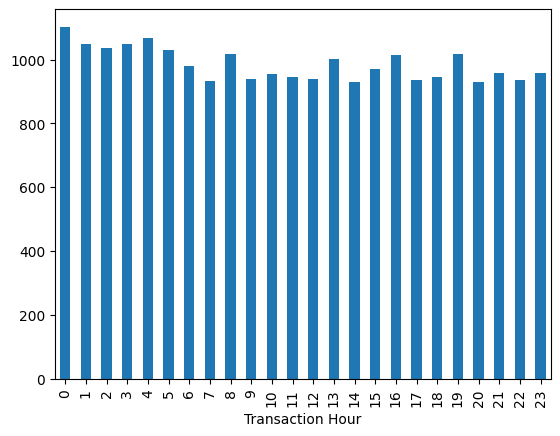

In [18]:
df['Transaction Hour'].value_counts().sort_index().plot(kind='bar')

# Categorical Columns

## Payment Method

In [19]:
total_transactions_by_payment = df.groupby('Payment Method').size()

fraudulent_by_payment = df[df['Is Fraudulent'] == 1].groupby('Payment Method').size()

fraud_percentage_by_payment = (fraudulent_by_payment / total_transactions_by_payment) * 100

fraud_analysis_by_payment = pd.DataFrame({
    'Total Transactions': total_transactions_by_payment,
    'Fraudulent Transactions': fraudulent_by_payment,
    'Fraudulent Percentage (%)': fraud_percentage_by_payment
})

print(fraud_analysis_by_payment)

                Total Transactions  Fraudulent Transactions  \
Payment Method                                                
PayPal                        5899                      310   
bank transfer                 5860                      326   
credit card                   5923                      301   
debit card                    5952                      285   

                Fraudulent Percentage (%)  
Payment Method                             
PayPal                           5.255128  
bank transfer                    5.563140  
credit card                      5.081884  
debit card                       4.788306  


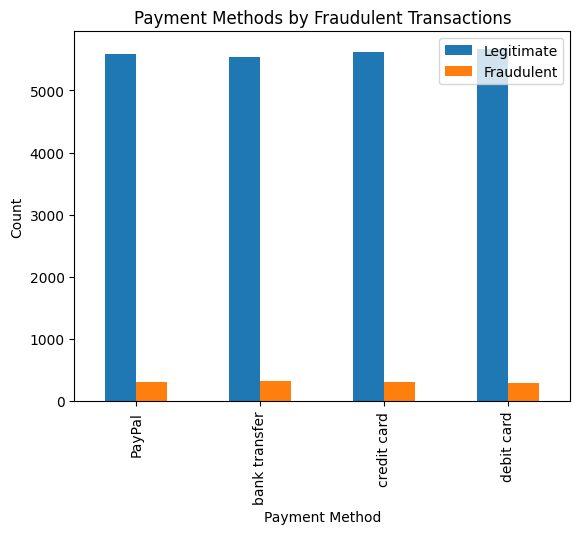

In [20]:
payment_methods = df.groupby(['Payment Method', 'Is Fraudulent']).size().unstack()

payment_methods.plot(kind='bar', stacked=False)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Methods by Fraudulent Transactions')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

## Product Category

In [21]:
total_transactions_by_product = df.groupby('Product Category').size()

fraudulent_by_product = df[df['Is Fraudulent'] == 1].groupby('Product Category').size()

fraud_percentage_by_product = (fraudulent_by_product / total_transactions_by_product) * 100

fraud_analysis_by_product = pd.DataFrame({
    'Total Transactions': total_transactions_by_product,
    'Fraudulent Transactions': fraudulent_by_product,
    'Fraudulent Percentage (%)': fraud_percentage_by_product
})

print(fraud_analysis_by_product)

                  Total Transactions  Fraudulent Transactions  \
Product Category                                                
clothing                        4699                      260   
electronics                     4748                      229   
health & beauty                 4671                      244   
home & garden                   4786                      258   
toys & games                    4730                      231   

                  Fraudulent Percentage (%)  
Product Category                             
clothing                           5.533092  
electronics                        4.823083  
health & beauty                    5.223721  
home & garden                      5.390723  
toys & games                       4.883721  


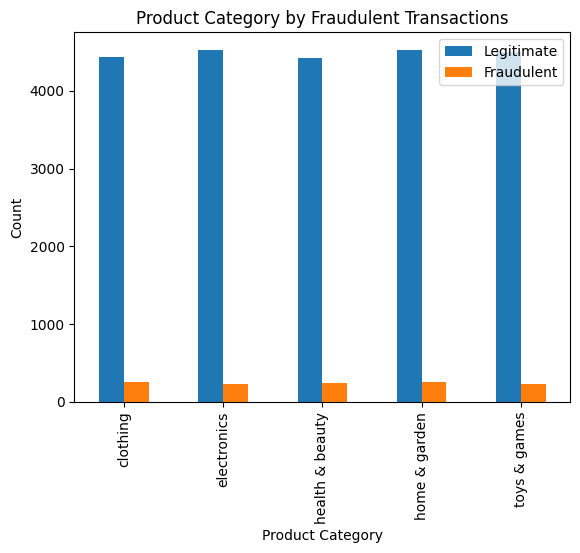

In [22]:
product_category = df.groupby(['Product Category', 'Is Fraudulent']).size().unstack()

product_category.plot(kind='bar', stacked=False)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category by Fraudulent Transactions')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

## Device Used

In [23]:
total_transactions_by_device = df.groupby('Device Used').size()

fraudulent_by_device = df[df['Is Fraudulent'] == 1].groupby('Device Used').size()

fraud_percentage_by_device = (fraudulent_by_device / total_transactions_by_device) * 100

fraud_analysis_by_device = pd.DataFrame({
    'Total Transactions': total_transactions_by_device,
    'Fraudulent Transactions': fraudulent_by_device,
    'Fraudulent Percentage (%)': fraud_percentage_by_device
})

print(fraud_analysis_by_device)

             Total Transactions  Fraudulent Transactions  \
Device Used                                                
desktop                    7923                      406   
mobile                     7881                      429   
tablet                     7830                      387   

             Fraudulent Percentage (%)  
Device Used                             
desktop                       5.124322  
mobile                        5.443472  
tablet                        4.942529  


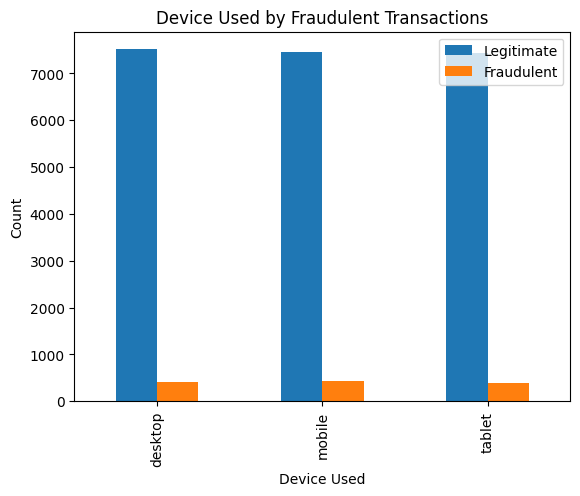

In [24]:
device_Used = df.groupby(['Device Used', 'Is Fraudulent']).size().unstack()

device_Used.plot(kind='bar', stacked=False)
plt.xlabel('Device Used')
plt.ylabel('Count')
plt.title('Device Used by Fraudulent Transactions')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

## Analysis of Categorical Columns with `Transaction Amount` and `Quantity`

In [25]:
# Group by 'Product Category' and calculate the average transaction amount, quantity, and fraudulent percentage
category_stats = df.groupby('Product Category').agg({
    'Transaction Amount': 'mean',
    'Quantity': 'mean',
    'Is Fraudulent': 'mean'  # Calculate the mean of 'Is Fraudulent' to get the percentage
})

# Rename the columns for better readability
category_stats = category_stats.rename(columns={
    'Transaction Amount': 'Average Transaction Amount',
    'Quantity': 'Average Quantity',
    'Is Fraudulent': 'Fraudulent Percentage'
})

category_stats

,Average Transaction Amount,Average Quantity,Fraudulent Percentage
Product Category,,,
clothing,228.695465,2.981060,0.055331
electronics,228.216740,3.058762,0.048231
health & beauty,226.510871,2.960608,0.052237
home & garden,234.907428,2.989553,0.053907
toys & games,228.403744,3.012051,0.048837


In [26]:
# Group by 'Product Category' and calculate the average transaction amount, quantity, and fraudulent percentage
category_stats = df.groupby('Payment Method').agg({
    'Transaction Amount': 'mean',
    'Quantity': 'mean',
    'Is Fraudulent': 'mean'  # Calculate the mean of 'Is Fraudulent' to get the percentage
})

# Rename the columns for better readability
category_stats = category_stats.rename(columns={
    'Transaction Amount': 'Average Transaction Amount',
    'Quantity': 'Average Quantity',
    'Is Fraudulent': 'Fraudulent Percentage'
})

category_stats

,Average Transaction Amount,Average Quantity,Fraudulent Percentage
Payment Method,,,
PayPal,232.859739,3.001526,0.052551
bank transfer,229.346338,3.010239,0.055631
credit card,227.438727,2.992571,0.050819
debit card,227.844975,2.997984,0.047883


# Correlation Analysis

<Axes: >

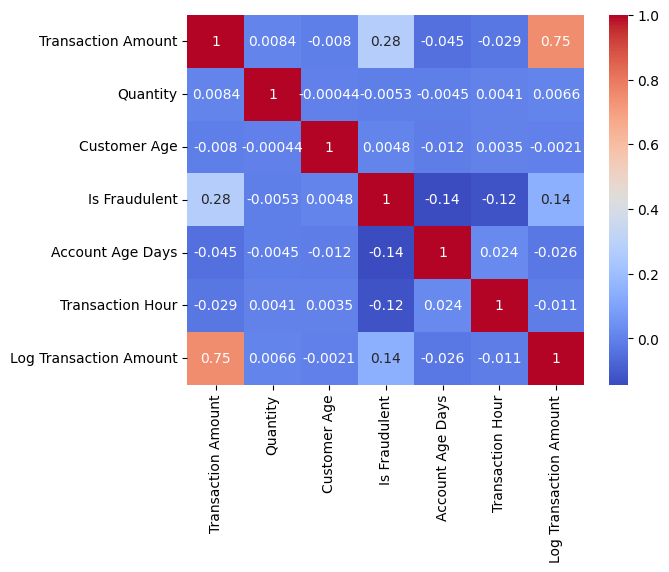

In [27]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_columns].corr()

# Create a correlation plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Feature Engineering

In [ ]:
# Remove negative ages
df = df[df['Customer Age'] >= 0]

## Converting IP address to location information


In [73]:
# Using ip2geotools package
def printDetails(ip):
    res = DbIpCity.get(ip, api_key="free")
    print(f"IP Address: {res.ip_address}")
    print(f"Location: {res.city}, {res.region}, {res.country}")
    print(f"Coordinates: (Lat: {res.latitude}, Lng: {res.longitude})")


df['IP Country'] = df['IP Address'].apply(lambda x: DbIpCity.get(x, api_key="free").country)
df['IP Region'] = df['IP Address'].apply(lambda x: DbIpCity.get(x, api_key="free").region)
df['IP City'] = df['IP Address'].apply(lambda x: DbIpCity.get(x, api_key="free").city)

Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Sanming%2C+Fujian+CN&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Sanming%2C+CN&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Seongnam-si+%28Buljeong-ro%29%2C+Gyeonggi-do+KR&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=Seongnam-si+%28Buljeong-ro%29%2C+KR&format=jsonv2&addressdetails=1&limit=1
Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for 

KeyboardInterrupt: 

In [37]:
# Add in additional data from ip address (source: https://ip-api.com/docs/api:json#test)
for i in range(len(df)):
    ip_address = df.loc[i, 'IP Address']
    try:
      response = requests.get(f"http://ip-api.com/json/{ip_address}?fields=189145")
      response = response.json()
    except:
      print("Request failed at row", i)
    if response["status"] == "success":
      # df.loc[i, "latitude"] = response["lat"]
      # df.loc[i, "longitude"] = response["lon"]
      df.loc[i, "country"] = response["country"]
      df.loc[i, "city"] = response["city"]
      # df.loc[i, "isp"] = response["isp"]
      # df.loc[i, "proxy"] = response["proxy"]

  # Probably needa use batch api https://ip-api.com/docs/api:batch


Request failed at row 13
Request failed at row 18


In [ ]:
# Consider adding a check of IP address to other addresses as well

In [28]:
# Add column for when shipping address == billing address
df['addressesMatch'] = df['Shipping Address'] == df['Billing Address']

In [29]:
# Check if Shipping Address contains any PO Box indicators ("APO", "FPO", "DPO")
df['isPOBox'] = df['Shipping Address'].str.contains(r'\b(APO|FPO|DPO)\b', case=False, regex=True)

/var/folders/2q/ph9fxp4s3lz122mj_36rf7vm0000gp/T/ipykernel_7284/3515597938.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['isPOBox'] = df['Shipping Address'].str.contains(r'\b(APO|FPO|DPO)\b', case=False, regex=True)


In [ ]:
# Adds a column to check if country of ip address matches that of shipping and billing (based on cursory look, all addresses in shipping and billing are in USA (either residential or PO box))

# df["ipLocationMatchesUSA"] = False

# for i in range(len(df)):
#     ip_address = df.loc[i, 'IP Address']
#     try:
#         response = requests.get(f"http://ip-api.com/json/{ip_address}?fields=189145")
#         response = response.json()
#     except Exception as e:
#         print(f"Request failed at row {i} for IP {ip_address} with error: {e}")

#     # Set ipLocationMatchesUSA to True if the country is "United States", otherwise leave as False
#     if response.get("status") == "success" and response.get("country") == "United States":
#         df.loc[i, "ipLocationMatchesUSA"] = True

In [30]:
# Check shipping == billing address
df.loc[:, 'ShipBill'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [ ]:
# Ordinal encode age groups
print(df['Age Group'].head())
labels = ['-20 to 0', '1-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-86']
age_groups_mapping = {'-20 to 0': 0, '1-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-55': 5, '56-65': 6, '66-75': 7, '76-86': 8}
df['Age Group'] = df['Age Group'].map(age_groups_mapping)
print(df['Age Group'].head())


0     1-17
1    36-45
2    18-25
3    26-35
4    46-55
Name: Age Group, dtype: category
Categories (9, object): ['-20 to 0' < '1-17' < '18-25' < '26-35' ... '46-55' < '56-65' < '66-75' < '76-86']
0    1
1    4
2    2
3    3
4    5
Name: Age Group, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]


In [ ]:
df.loc[df['Age Group'].isnull(), 'Customer Age']

,Customer Age


In [31]:
# One-hot encode Payment Method,Product Category and Type of device used
df_encoded = pd.get_dummies(df, columns = ["Payment Method","Product Category","Device Used"])

In [ ]:
# Extract individual time features from transaction_date, use cyclic transformer for hour and months to make it cyclical (model perceives 12 and 1 as next to each other)

In [32]:
# Save intermediate dataset
df_encoded.to_csv("Cleaned data/finalised_data.csv", index=False)